# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

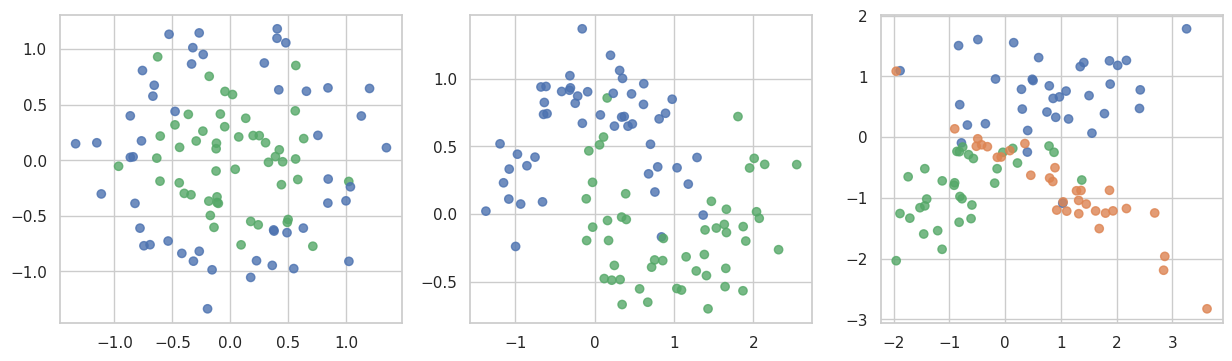

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

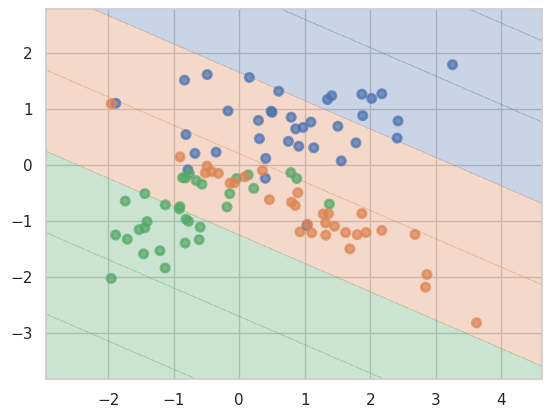

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

named_datasets = [
    ('circles', make_circles(noise=0.2, factor=0.5, random_state=42)),
    ('moons',   make_moons(noise=0.2, random_state=42)),
    ('linear3', make_classification(n_classes=3, n_clusters_per_class=1,
                                    n_features=2, class_sep=0.8,
                                    random_state=3, n_redundant=0))
]

circles  — train_acc = 1.000, test_acc = 0.700
moons    — train_acc = 1.000, test_acc = 0.933
linear3  — train_acc = 1.000, test_acc = 0.667


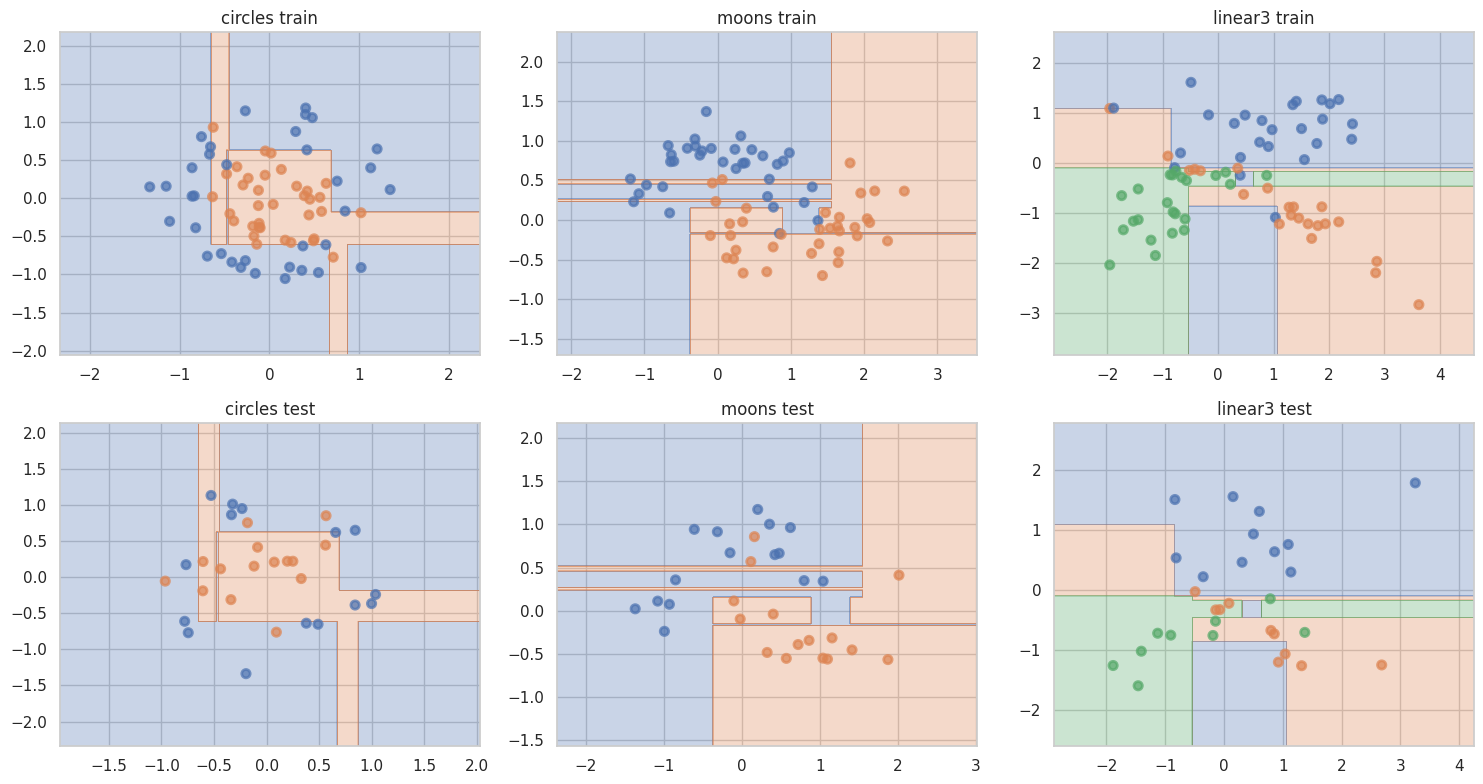

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for idx, (name, (X, y)) in enumerate(named_datasets):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)


    acc_train = accuracy_score(y_train, clf.predict(X_train))
    acc_test  = accuracy_score(y_test,  clf.predict(X_test))
    print(f"{name:8s} — train_acc = {acc_train:.3f}, test_acc = {acc_test:.3f}")

    plt.sca(axes[0, idx])
    plot_surface(clf, X_train, y_train)
    axes[0, idx].set_title(f"{name} train")

    plt.sca(axes[1, idx])
    plot_surface(clf, X_test, y_test)
    axes[1, idx].set_title(f"{name} test")

fig.tight_layout()
plt.show()

__Ответ:__

Судя по точности у train_acc равной 1 и сравнивая ее с test_acc - можно сделать вывод, что однозначно  да. Графики это как дополнение, где видно явное переобучение по маленьким горизонтальным полоскам.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [11]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

named_datasets = [
    ('circles', make_circles(noise=0.2, factor=0.5, random_state=42)),
    ('moons',   make_moons(noise=0.2, random_state=42)),
    ('linear3', make_classification(
        n_classes=3, n_clusters_per_class=1,
        n_features=2, class_sep=0.8,
        random_state=3, n_redundant=0
    ))
]

splits = {}
for name, (X, y) in named_datasets:
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )
    splits[name] = (X_tr, X_te, y_tr, y_te)

param_grid = {
    'max_depth':       [1, 3, None],
    'min_samples_leaf':[1, 5, 10]
}


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

all_rows = []
for name, (X_tr, X_te, y_tr, y_te) in splits.items():
    for depth in param_grid['max_depth']:
        for leaf in param_grid['min_samples_leaf']:
            clf = DecisionTreeClassifier(
                max_depth=depth,
                min_samples_leaf=leaf,
                random_state=42
            )
            clf.fit(X_tr, y_tr)
            all_rows.append({
                'dataset':         name,
                'max_depth':       depth,
                'min_samples_leaf':leaf,
                'acc_train':       accuracy_score(y_tr, clf.predict(X_tr)),
                'acc_test':        accuracy_score(y_te, clf.predict(X_te))
            })

df_all = pd.DataFrame(all_rows)


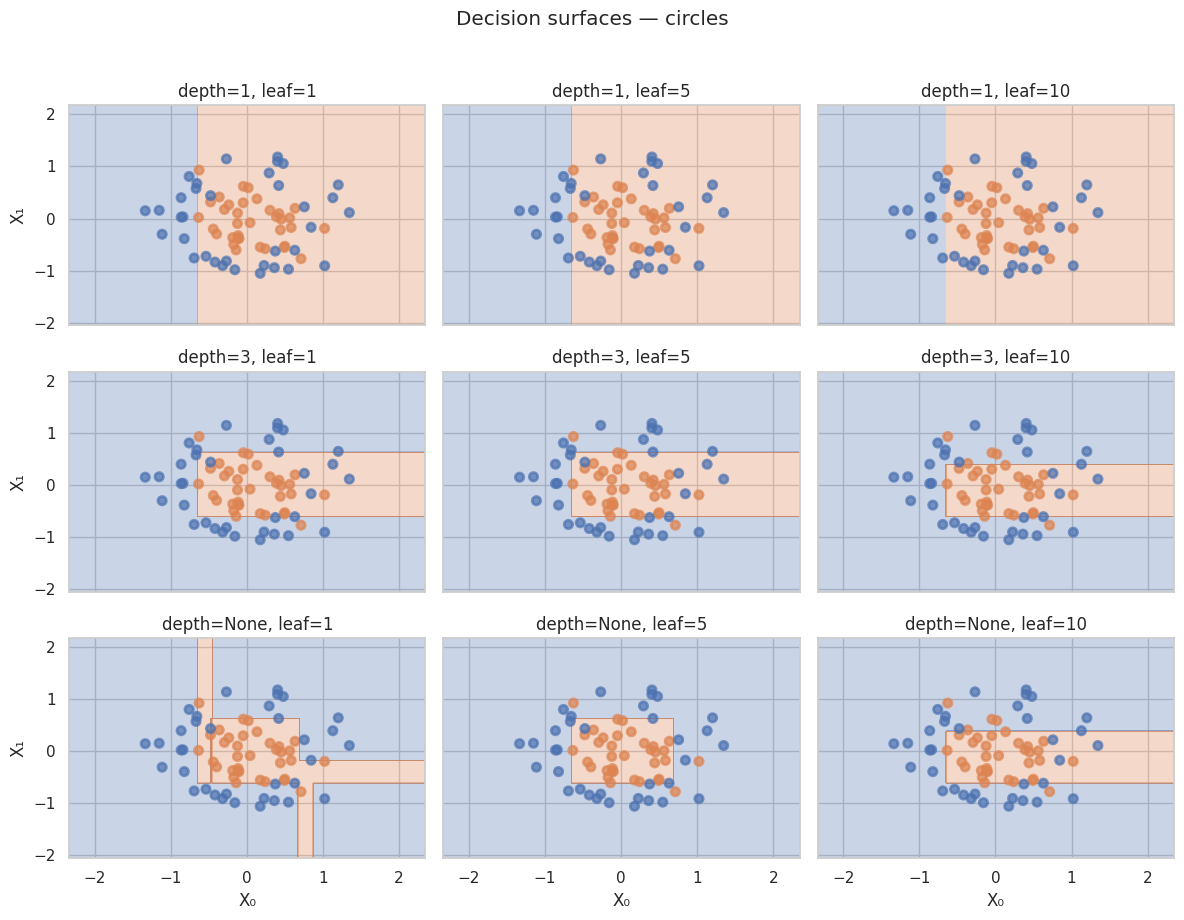

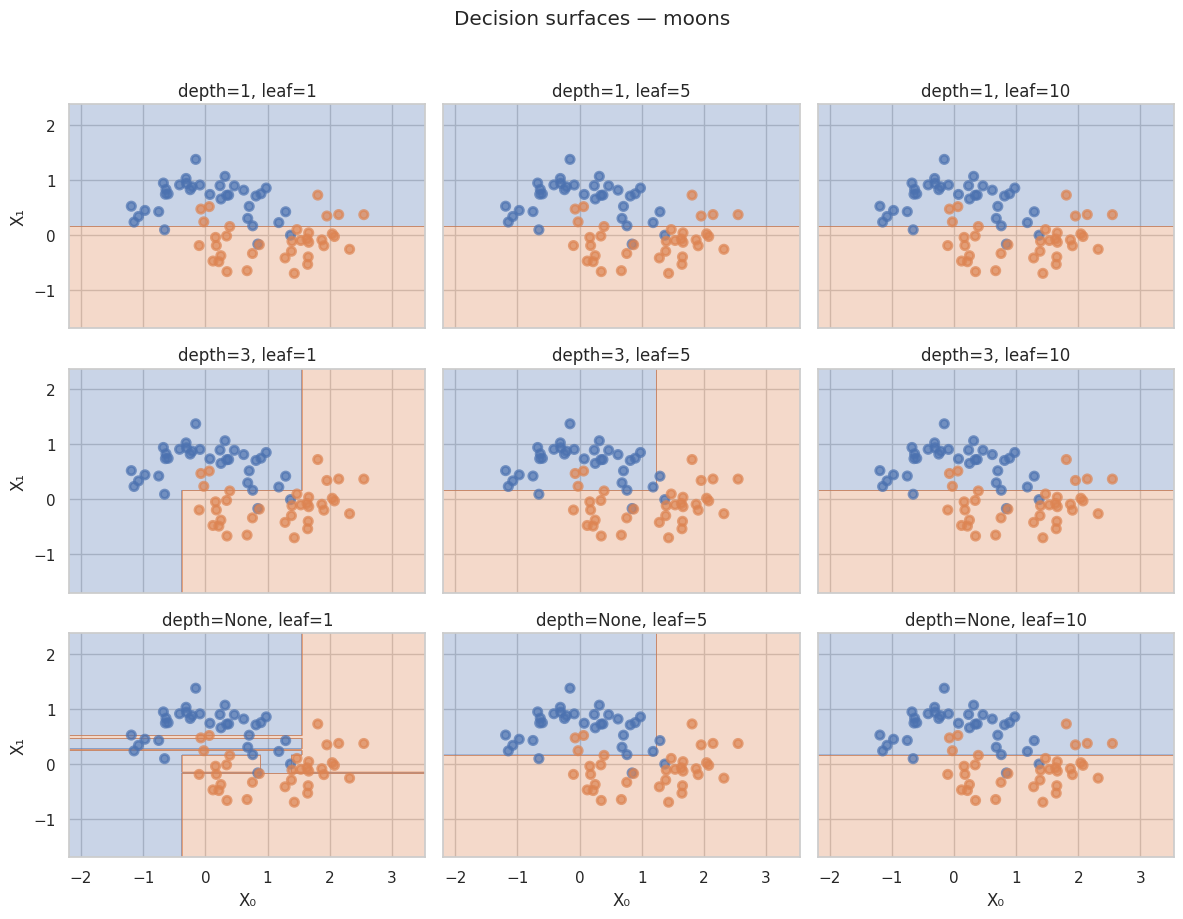

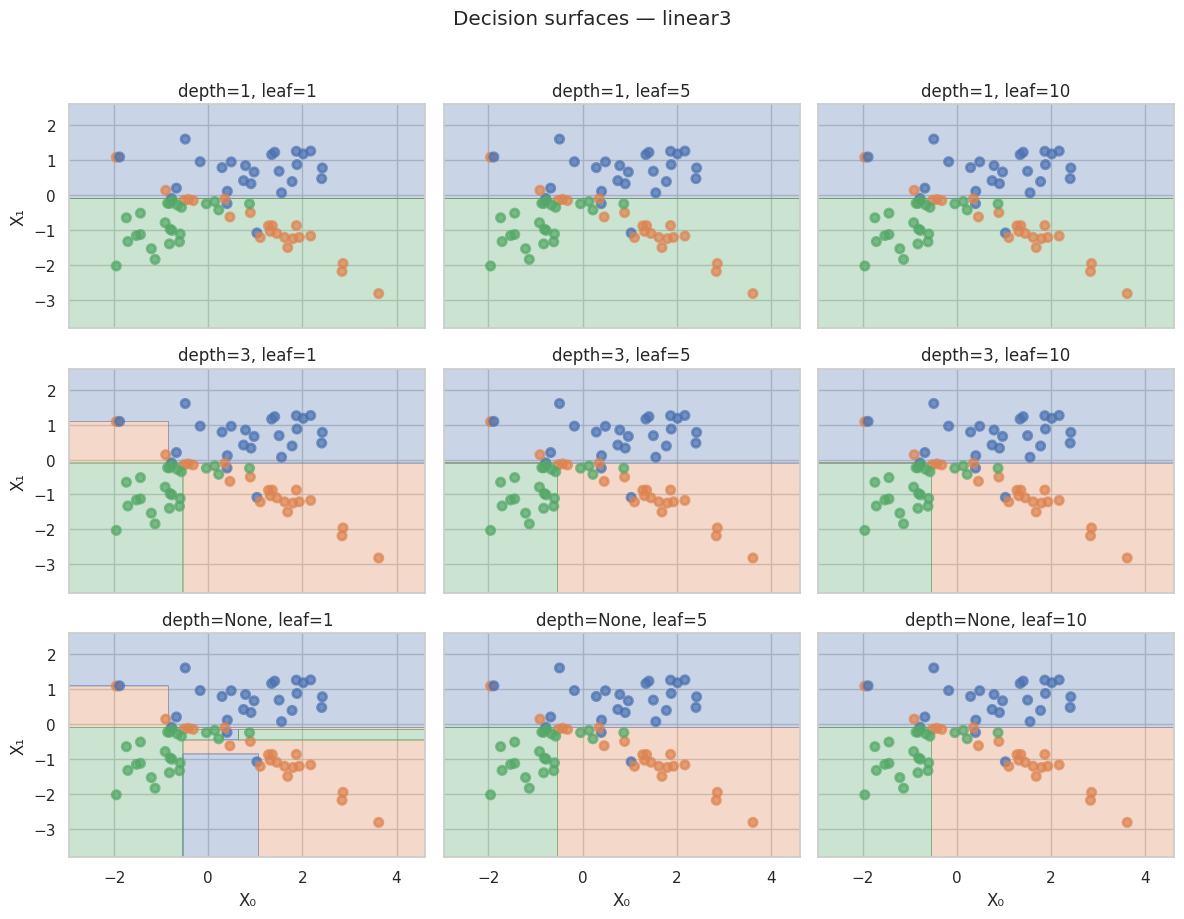

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


for name, (X_tr, X_te, y_tr, y_te) in splits.items():
    n_d = len(param_grid['max_depth'])
    n_l = len(param_grid['min_samples_leaf'])
    fig, axes = plt.subplots(n_d, n_l, figsize=(4*n_l, 3*n_d), sharex=True, sharey=True)

    for i, depth in enumerate(param_grid['max_depth']):
        for j, leaf in enumerate(param_grid['min_samples_leaf']):
            clf = DecisionTreeClassifier(
                max_depth=depth,
                min_samples_leaf=leaf,
                random_state=42
            )
            clf.fit(X_tr, y_tr)

            ax = axes[i, j]
            plt.sca(ax)
            plot_surface(clf, X_tr, y_tr)
            ax.set_title(f"depth={depth}, leaf={leaf}")
            if i == n_d - 1: ax.set_xlabel("X₀")
            if j == 0:       ax.set_ylabel("X₁")

    fig.suptitle(f"Decision surfaces — {name}", y=1.02)
    plt.tight_layout()
    plt.show()


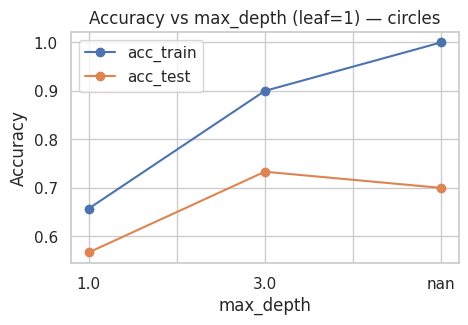

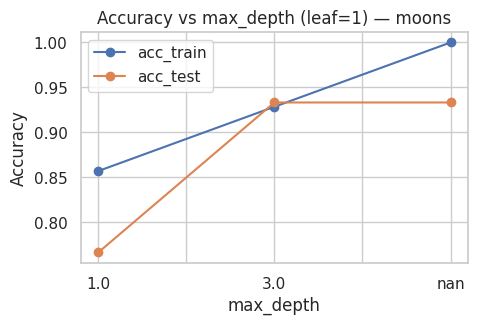

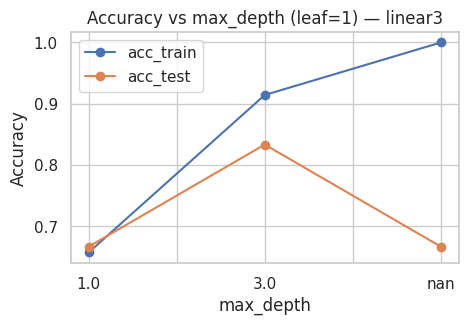

In [14]:
import matplotlib.pyplot as plt

for name in df_all['dataset'].unique():
    df = df_all[(df_all['dataset'] == name) & (df_all['min_samples_leaf'] == 1)].copy()
    df['max_depth_str'] = df['max_depth'].astype(str)

    df.plot(
        x='max_depth_str',
        y=['acc_train','acc_test'],
        marker='o',
        figsize=(5,3),
        title=f"Accuracy vs max_depth (leaf=1) — {name}"
    )
    plt.xlabel("max_depth")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()


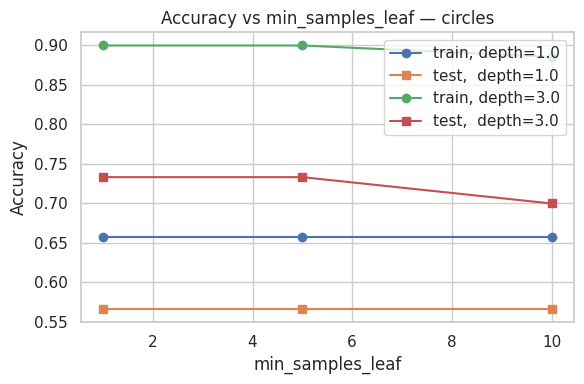

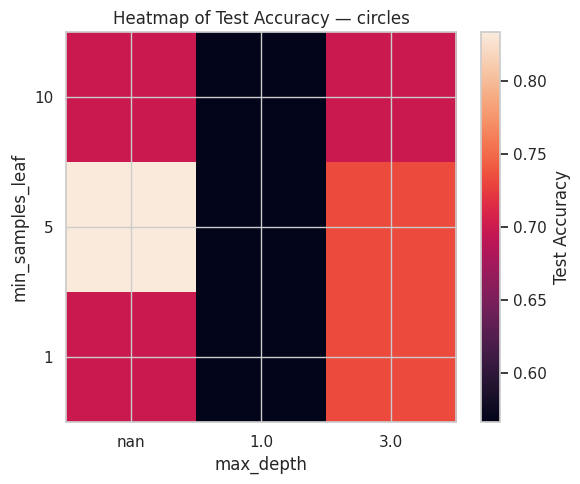

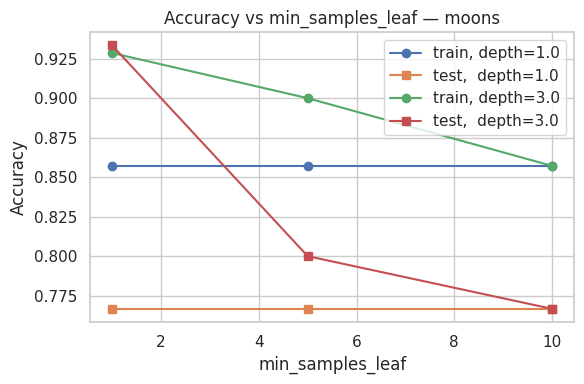

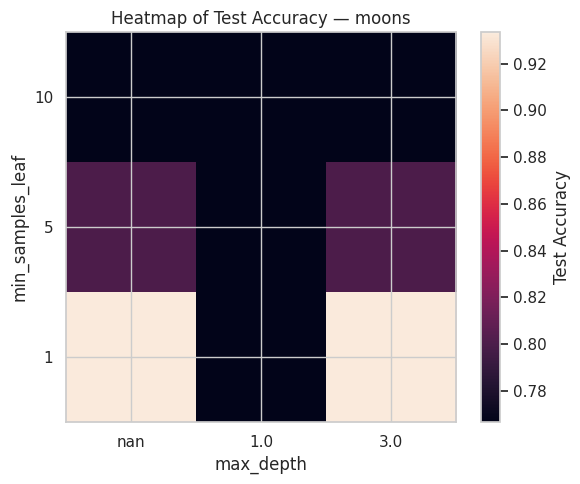

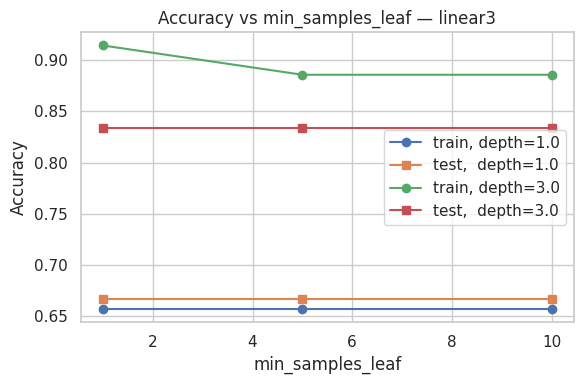

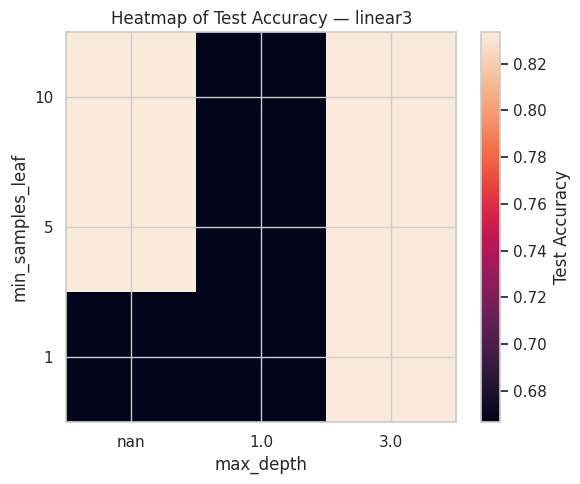

In [15]:
import matplotlib.pyplot as plt

for name in df_all['dataset'].unique():
    df = df_all[df_all['dataset'] == name]

    plt.figure(figsize=(6,4))
    for depth in sorted(df['max_depth'].dropna().unique(), key=lambda x: (x is None, x)):
        df_d = df[df['max_depth'] == depth]
        plt.plot(df_d['min_samples_leaf'], df_d['acc_train'],
                 marker='o', label=f"train, depth={depth}")
        plt.plot(df_d['min_samples_leaf'], df_d['acc_test'],
                 marker='s', label=f"test,  depth={depth}")
    plt.title(f"Accuracy vs min_samples_leaf — {name}")
    plt.xlabel("min_samples_leaf")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    pivot = df.pivot(index='min_samples_leaf', columns='max_depth', values='acc_test')
    plt.figure(figsize=(6,5))
    plt.imshow(pivot.values, aspect='auto', origin='lower')
    plt.colorbar(label='Test Accuracy')
    plt.xticks(range(len(pivot.columns)), pivot.columns)
    plt.yticks(range(len(pivot.index)), pivot.index)
    plt.xlabel('max_depth')
    plt.ylabel('min_samples_leaf')
    plt.title(f"Heatmap of Test Accuracy — {name}")
    plt.tight_layout()
    plt.show()


__Ответ:__

Глубина дерева: на всех трёх датасетах увеличение глубины более 3 приводит к переобучению. Это проявляется в том, что точность на обучающей выборке почти 100%, а на тестовой падает.

Количество листьев: наблюдается явная стагнация качества после 5 листьев. Возможно, дерево исчерпывает возможности по разбиению пространства, либо начинает переобучаться на шум. Отметим выборку **moon**, так как там не стагнация на 5 листьях, а вообще резкое падение при depth=3. Причиной этому находим в самой выборке.

В итоге:
Для датасета - кружки, оптимально использовать параметры до точки стагнации — модель выучивает границу, но не переходит к переобучению.
Для датасета - луны, максимальная глубина, с объектами в листьях 1. Можно сделать вывод, что для такой задачи решающие деревья - плохой способ решения. Переобучение быстро наступает.
Для датасета - linear, задача  хорошо аппроксимируется деревьями, даже при относительно больших значениях глубины и числа листьев — модель остаётся устойчивой.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Done__

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [16]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


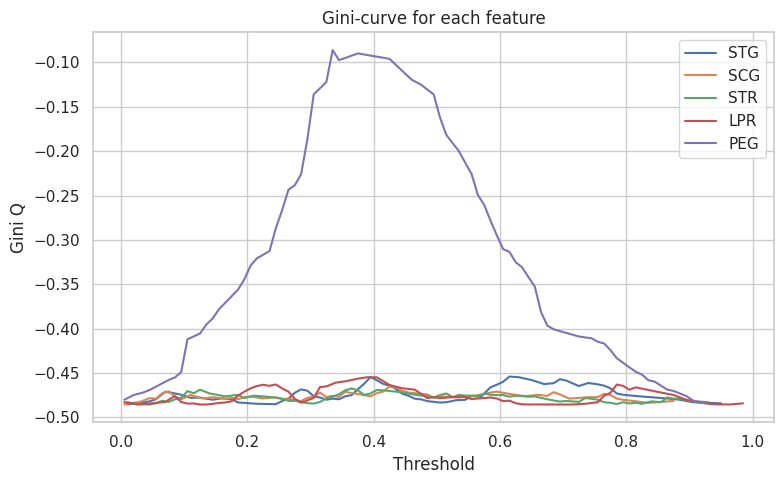

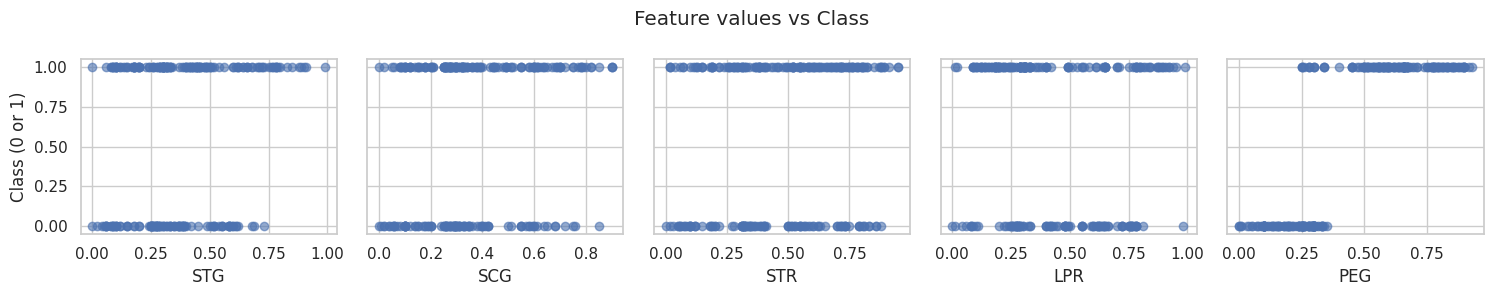

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from hw2code import find_best_split

df = pd.read_csv("datasets/students.csv")
X = df.iloc[:, :5].values
y = df.iloc[:, 5].values
feature_names = df.columns[:5]

fig, ax = plt.subplots(figsize=(8, 5))

for i, name in enumerate(feature_names):
    feature_vector = X[:, i]

    thresholds, ginis, thresh_best, gini_best = find_best_split(feature_vector, y)

    ax.plot(thresholds, ginis, label=name)

ax.set_xlabel("Threshold")
ax.set_ylabel("Gini Q")
ax.set_title("Gini-curve for each feature")
ax.legend()
plt.tight_layout()
plt.show()

fig2, axes = plt.subplots(1, 5, figsize=(15, 3), sharey=True)
for i, name in enumerate(feature_names):
    axes[i].scatter(X[:, i], y, alpha=0.6)
    axes[i].set_xlabel(name)
    if i == 0:
        axes[i].set_ylabel("Class (0 or 1)")
fig2.suptitle("Feature values vs Class")
plt.tight_layout()
plt.show()


__Вывод__

Полезен только PEG, что на кривых, что на scatter-графике - наилучший показатель при пороге 0.35

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

1-2. По признаку PEG в значение ~0.35 лучше проводить деление. Это видно из графиков кривых и scatter. Видно два почти раздельных облака точек, разделённых именно примерно в том месте, где Gini-кривая достигает пика. У остальных признаков классы сильно перемешаны без заметного разрыва

3.  График хорошего признака похож на график нормального распределения.
4. График плохого признака практически плоский.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Done__

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [18]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from hw2code import DecisionTree

df = pd.read_csv("datasets/agaricus-lepiota.data", header=None)

encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

feature_types = ["categorical"] * X.shape[1]
tree = DecisionTree(feature_types)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on mushrooms: {accuracy:.3f}")

def tree_depth(node):
    if node["type"] == "terminal":
        return 0
    left_depth  = tree_depth(node["left_child"])
    right_depth = tree_depth(node["right_child"])
    return 1 + max(left_depth, right_depth)

depth = tree_depth(tree._tree)
print(f"Depth of the mushroom tree: {depth}")

Accuracy on mushrooms: 1.000
Depth of the mushroom tree: 7


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("datasets/tic-tac-toe-endgame.csv", header=None)

X_ttt = df.iloc[:, :-1]
y_ttt = df.iloc[:, -1]


X_ttt = X_ttt.apply(LabelEncoder().fit_transform)

le_target = LabelEncoder()
y_ttt = le_target.fit_transform(y_ttt)


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

param_grid = {
    'max_depth':       [None, 1, 2, 3, 5, 7],
    'min_samples_split':[2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20]
}

results = []

for md in param_grid['max_depth']:
    for mss in param_grid['min_samples_split']:
        for msl in param_grid['min_samples_leaf']:
            tree = DecisionTree(feature_types,
                                max_depth=md,
                                min_samples_split=mss,
                                min_samples_leaf=msl)
            scores = cross_val_score(
                tree,
                X_ttt.values,
                y_ttt,
                cv=5,
                scoring='accuracy'
            )
            results.append({
                'max_depth': md,
                'min_samples_split': mss,
                'min_samples_leaf': msl,
                'accuracy_mean': scores.mean()
            })

df_res = pd.DataFrame(results)

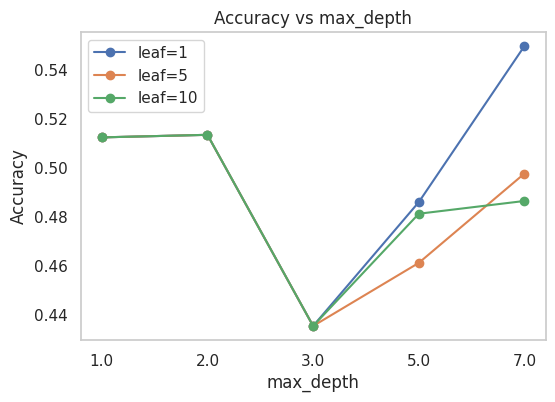

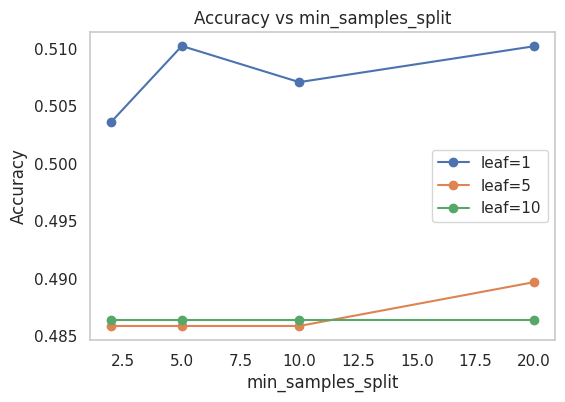

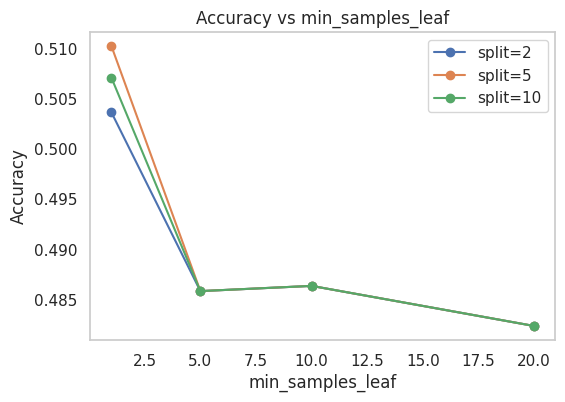

In [22]:
plt.figure(figsize=(6,4))
for msl in [1,5,10]:
    sub = df_res[df_res['min_samples_leaf']==msl]
    means = sub.groupby('max_depth')['accuracy_mean'].mean()
    plt.plot(means.index.astype(str), means.values, marker='o', label=f"leaf={msl}")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs max_depth")
plt.grid()
plt.show()

plt.figure(figsize=(6,4))
for msl in [1,5,10]:
    sub = df_res[df_res['min_samples_leaf']==msl]
    means = sub.groupby('min_samples_split')['accuracy_mean'].mean()
    plt.plot(means.index, means.values, marker='o', label=f"leaf={msl}")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs min_samples_split")
plt.grid()
plt.show()

plt.figure(figsize=(6,4))
for mss in [2,5,10]:
    sub = df_res[df_res['min_samples_split']==mss]
    means = sub.groupby('min_samples_leaf')['accuracy_mean'].mean()
    plt.plot(means.index, means.values, marker='o', label=f"split={mss}")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs min_samples_leaf")
plt.grid()
plt.show()

__Вывод__

Глубина дерева имеет самый сильный эффект: нужно давать дереву разветвляться — оптимум около 7 уровней.

Минимальный размер листа сильно ограничивает способность учиться, поэтому min_samples_leaf должно быть не больше 1–2.

min_samples_split играет роль лишь в сочетании с очень мелкими листьями и небольшими деревьями, в остальных случаях почти не влияет.

Заметим, самое низкое значение accuracy (~0.55) говорит о том, что текущая реализация плохо работает с номинальными признаками.

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [23]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from hw2code import DecisionTree

all_data = {}

df = pd.read_csv("datasets/agaricus-lepiota.data", header=None)
for col in df.columns:
    df[col] = LabelEncoder().fit_transform(df[col])
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
all_data['mushrooms'] = (X, y)

df = pd.read_csv("datasets/tic-tac-toe-endgame.csv", header=None)
X = df.iloc[:,:-1].apply(LabelEncoder().fit_transform).values
y = LabelEncoder().fit_transform(df.iloc[:,-1].values)
all_data['tic-tac-toe'] = (X, y)

url_cars = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
cols = ["buying","maint","doors","persons","lug_boot","safety","class"]
df = pd.read_csv(url_cars, names=cols)

df['class'] = df['class'].map(lambda v: 0 if v in ('unacc','acc') else 1)
X = df.iloc[:,:-1].apply(LabelEncoder().fit_transform).values
y = df['class'].values
all_data['cars'] = (X,y)

url_nursery = "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data"
cols = ["parents","has_nurs","form","children","housing","finance",
        "social","health","class"]
df = pd.read_csv(url_nursery, names=cols)

df['class'] = df['class'].map(lambda v: 0 if v in ('not_recom','recommend') else 1)
X = df.iloc[:,:-1].apply(LabelEncoder().fit_transform).values
y = df['class'].values
all_data['nursery'] = (X, y)

scorer = make_scorer(accuracy_score)

def make_algorithms(X,y):
    n_feat = X.shape[1]
    algos = {
        "DT_real":         DecisionTree(["real"]*n_feat),
        "DT_cat":          DecisionTree(["categorical"]*n_feat),
        "DT_real_ohe":     None,
        "SK_DT":           DecisionTreeClassifier(random_state=42)
    }
    ohe = OneHotEncoder(sparse_output=False)
    X_ohe = ohe.fit_transform(X)
    algos["DT_real_ohe"] = DecisionTree(["real"]*X_ohe.shape[1])
    return algos, X_ohe

results = []
for name, (X,y) in all_data.items():
    algos, X_ohe = make_algorithms(X,y)
    for alg_name, alg in algos.items():
        X_use = X_ohe if alg_name == 'DT_real_ohe' else X
        scores = cross_val_score(alg, X_use, y, cv=10, scoring=scorer)
        results.append({
            "dataset": name,
            "algorithm": alg_name,
            "accuracy": scores.mean(),
        })

df_res = pd.DataFrame(results)

table = df_res.pivot_table(
    index="dataset",
    columns="algorithm",
    values="accuracy"
).round(3)

print(table)

algorithm    DT_cat  DT_real  DT_real_ohe  SK_DT
dataset                                         
cars          0.968    0.943        0.919  0.943
mushrooms     1.000    0.999        1.000  0.960
nursery       1.000    1.000        1.000  1.000
tic-tac-toe   0.601    0.497        0.595  0.785


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

На датасетах mushrooms и nursery все модели показывают точность, близкую к 1.0. Это так, потому что признаки там категориальные и чётко определяют целевое значение. Жадные деревья легко находят разделяющие правила, а различия между подходами минимальны.

На датасете cars лучше всего работает дерево на категориальных признаках. Вариант с числовыми признаками ранжирует уровни и теряет точность. One-hot создаёт слишком много бинарных признаков, что приводит к переобучению.

На tic-tac-toe только sklearn-дерево показывает приемлемую точность. Остальные алгоритмы не справляются из-за сложности взаимодействий между признаками.


__Отличия__

Разные типы данных требуют разных подходов. Для задач с чистыми категориальными признаками эффективны простые деревья. Для сложных взаимодействий между признаками требуются более мощные модели.

Реализация сплиттера также влияет: простые деревья перебирают пороги, а sklearn может использовать разные стратегии и учитывать случайность при равенстве приростов.

__Компонента случайности__
 Её можно исключить, зафиксировав random_state и включив shuffle в кросс-валидации.

__Повышение точности__

Повысить точность можно за счёт настройки гиперпараметров, применения ансамблей, а также настройки признаков.


__Отзыв__

В целом потратил пару дней, опыт приятный - разобрался во многих вещах. Задачи достаточного уровня сложности, многие вопросы отпали, а также некоторые нюансы для себя открыл.